In [2]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

In [4]:
# chargement des donnees (avec pandas)
df = pd.read_csv('diabetes.csv',sep=',')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [44]:
# # un numpy array des valeurs numeriques (pour la suite)
# data = df._get_numeric_data().values
# nomDesVilles = list(df.index)
# nomDesVariables_ = list(df)

# # on met une partie des individus et des variables de cote
# indice_individus = np.array(range(768))
# indice_variables = np.array(range(9))

# # broadcasting 
# X = data[indice_individus[:,None],indice_variables] 

# # List Comprehensions
# nomDesVariables = [nomDesVariables_[i] for i in indice_variables]
# nomDesIndividus = [nomDesVilles[i] for i in indice_individus]

In [45]:
# moyennes = X.mean(axis=0)
# moyennes

In [46]:
# #ecartTypes = X.std(axis=0,ddof=0)
# ecartTypes = X.std(axis=0,ddof=1)
# ecartTypes

In [47]:
# Xc = X - moyennes
# Xcr = Xc / ecartTypes
# Xcr

In [5]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X = df[feature_names].values
X = scale(X)
feature_df = pd.DataFrame(X, columns=feature_names)
target = feature_df.iloc[:,0]
Features = feature_df.iloc[:,1:]

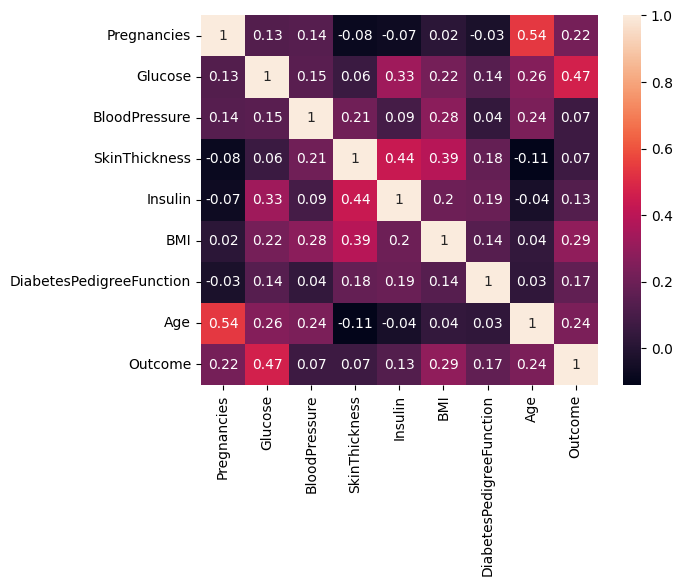

In [6]:
import seaborn as sn

feat_num = len(feature_names)

# plt.figure(figsize=(feat_num,feat_num/2))
corrMatrix = feature_df.corr().round(2)
sn.heatmap(corrMatrix, annot=True)

# plt.tight_layout()
    
plt.show()

[0.09173247 0.08275821 0.09214682 0.02904655 0.10583877 0.12160621
 0.46805765 0.00881331]


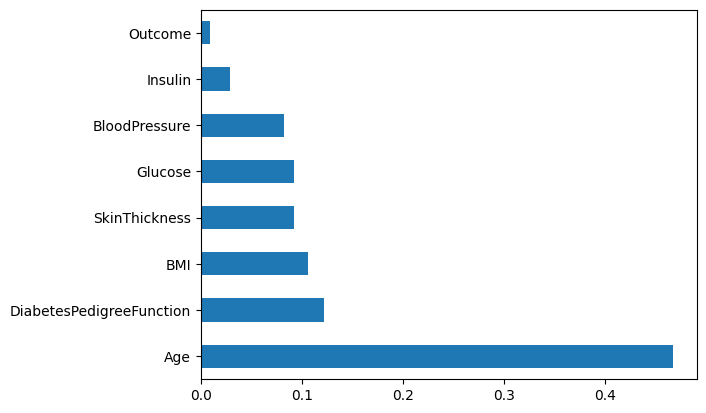

In [7]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(Features, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Features.columns)
feat_importances.nlargest(Features.shape[1]).plot(kind='barh')
plt.show()

In [16]:
size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.2068188646287734


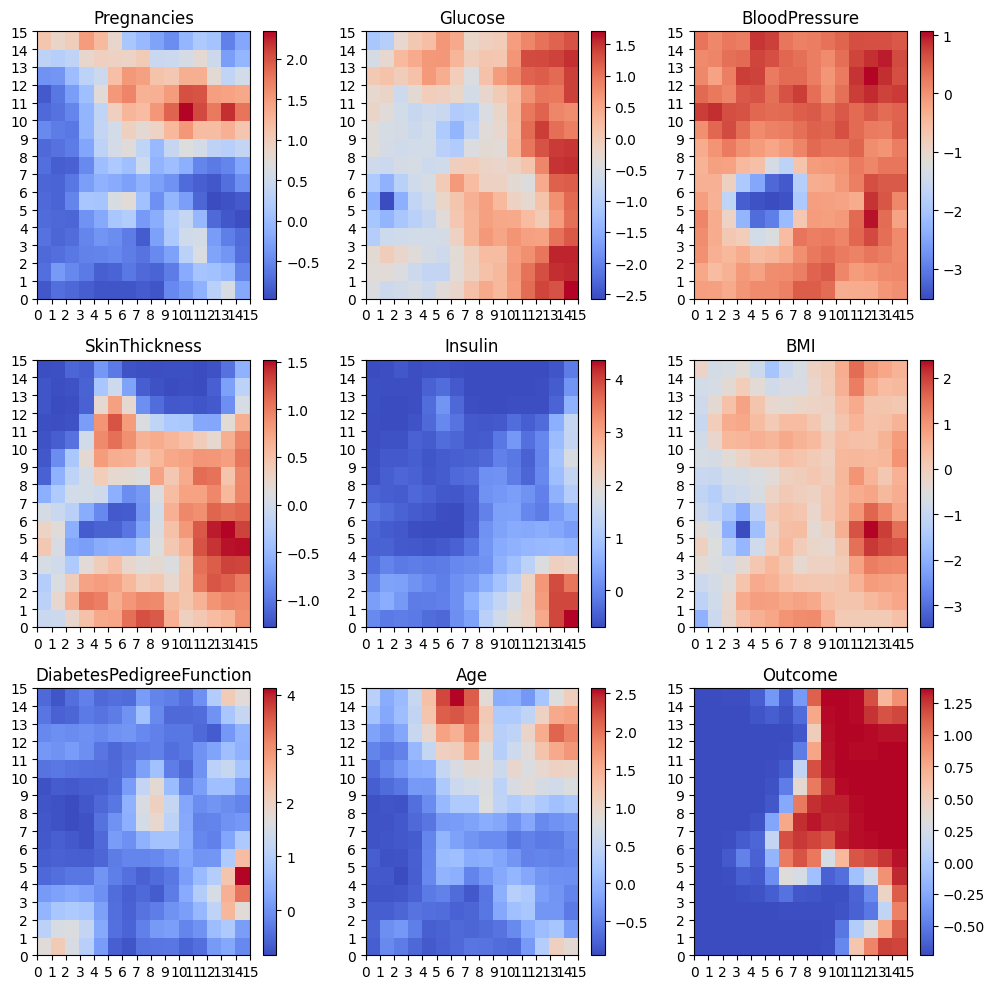

In [19]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    plt.colorbar()
plt.tight_layout()
plt.show()

# Comment (corrélation linéaires et non-linéaires = c'est plus puissant que les cercles de corrélations)
#Size (le zoom) & sigma (dépendance des autres clusters) important
#C'est une carte avec zoom et dézoom (comme les cartes géoraphiques) = regardez les différentes maps et on voit des différences
#On regarde les zones en rouges et on voit dirrectement des corrélations typiquement avec Blood et BMI + Skin(les tâches bleues)
# Blood et insulin sont anti-corrélations
# = quantization error c'est la perte d'information (1.2068188646287734 / 3.129657926367816) = 38% pertes entre le size 15 et 1